# LSTM Model for Stock Prediction

In [1]:
##Importing necessary libraries
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
start = '2010-01-01'
end = '2021-12-31'
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


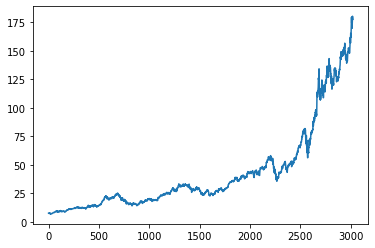

In [6]:
plt.plot(df['Close'])

In [7]:
## 100 day moving average of "Close" column
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

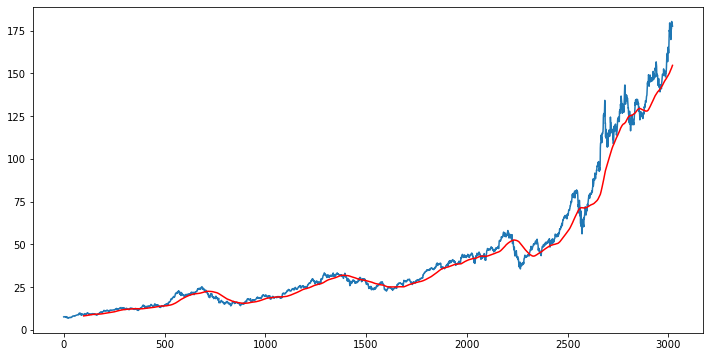

In [8]:
##plot 100 day moving average
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
## 200 day moving average of "Close" column
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

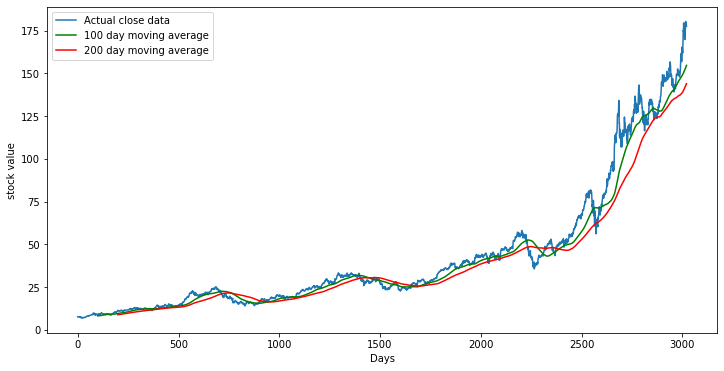

In [15]:
##plot 200 day moving average
plt.figure(figsize = (12,6))
plt.plot(df.Close, label='Actual close data ')
plt.plot(ma100,'g', label='100 day moving average')
plt.plot(ma200, 'r', label='200 day moving average')
plt.xlabel("Days")
plt.ylabel('stock value')
plt.legend()
         

In [16]:
df.shape

(3022, 5)

In [17]:
##splitting data into training and testing
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2115, 1)
(907, 1)


In [18]:
data_train.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [19]:
data_test.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [21]:
data_train_array = sc.fit_transform(data_train)
data_train_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [22]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
 
## converting x_train and y_train into array
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
##ML Model
## import libraries

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
x_train.shape

(2015, 100, 1)

In [30]:
##Building RNN  LSTM Model
model = Sequential()

##first hidden layer
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

##second hidden layer
model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.25))

##third hidden layer
model.add(LSTM(units = 100, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

##fourth hidden layer
model.add(LSTM(units = 150, activation='relu'))
model.add(Dropout(0.30))
          
          
          
##add dense layer
model.add(Dense(units=1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 100)          64400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               1

In [32]:
##compile the model

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=40)

Epoch 1/40
63/63 [==============================] - 47s 269ms/step - loss: 0.0892
Epoch 2/40
63/63 [==============================] - 16s 258ms/step - loss: 0.0053
Epoch 3/40
63/63 [==============================] - 16s 259ms/step - loss: 0.0038
Epoch 4/40
63/63 [==============================] - 16s 256ms/step - loss: 0.0035
Epoch 5/40
63/63 [==============================] - 16s 258ms/step - loss: 0.0040
Epoch 6/40
63/63 [==============================] - 16s 255ms/step - loss: 0.0038
Epoch 7/40
63/63 [==============================] - 16s 259ms/step - loss: 0.0036
Epoch 8/40
63/63 [==============================] - 16s 255ms/step - loss: 0.0033
Epoch 9/40
63/63 [==============================] - 16s 258ms/step - loss: 0.0031
Epoch 10/40
63/63 [==============================] - 16s 255ms/step - loss: 0.0032
Epoch 11/40
63/63 [==============================] - 16s 260ms/step - loss: 0.0027
Epoch 12/40
63/63 [==============================] - 16s 254ms/step - loss: 0.0027
Epoch 13/40
6

In [34]:
model.save('stock_prediction.h5')

In [35]:
data_test.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [36]:
past_100_days = data_train.tail(100)

In [37]:
##append last 100 data to test data
final_df = past_100_days.append(data_test, ignore_index=True)

In [38]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [39]:
input_data = sc.fit_transform(final_df)

In [41]:
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [42]:
input_data.shape

(1007, 1)

In [43]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
 
## converting x_test and y_test into array
x_test, y_test = np.array(x_test), np.array(y_test)

In [44]:
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [45]:
##Making Predictions

y_pred = model.predict(x_test) 


In [46]:
y_pred.shape

(907, 1)

In [47]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [48]:
##scaling factor 
sc.scale_

array([0.00690691])

In [49]:
scale_factor = 1/0.00690691
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

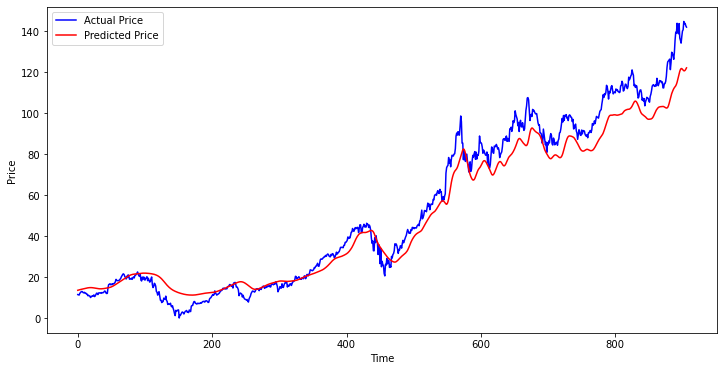

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Actual Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()